In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0358 - accuracy: 0.4677 - val_loss: 0.0240 - val_accuracy: 0.5395
Epoch 2/50
50000/50000 [==============================] - 84s 2ms/step - loss: 0.0219 - accuracy: 0.5705 - val_loss: 0.0205 - val_accuracy: 0.5908
Epoch 3/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0194 - accuracy: 0.5915 - val_loss: 0.0188 - val_accuracy: 0.6042
Epoch 4/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0182 - accuracy: 0.5998 - val_loss: 0.0177 - val_accuracy: 0.6106
Epoch 5/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0174 - accuracy: 0.6053 - val_loss: 0.0170 - val_accuracy: 0.6091
Epoch 6/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0169 - accuracy: 0.6083 - val_loss: 0.0167 - val_accuracy: 0.6095
Epoch 7/50
50000/50000 [==============================] - 83s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [21]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [22]:
encoded_test_data.shape

(10000, 128)

In [23]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [24]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [25]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RSAM.csv', index = False)

In [26]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [27]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 9


In [28]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [29]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [30]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
91,3,cat,0.748936,0.963851,0.828524,0.176164,0.075307,0.284767,1.077477,0.259401,...,1.263035,1.158398,1.229319,1.003509,1.394807,1.413197,1.510301,1.169228,1.000000,0.000000
481,6,frog,0.686223,0.844698,1.080878,0.293940,0.155542,0.346397,1.001105,0.442630,...,1.264814,1.298430,1.348829,0.895133,1.326998,1.371920,1.464219,1.229681,0.990194,0.009806
6032,4,deer,0.605034,0.950775,0.854539,0.171271,0.170378,0.361572,0.864517,0.393440,...,1.160385,1.282269,1.112759,0.780939,1.203524,1.168829,1.548792,1.144325,0.988323,0.011677
7161,5,dog,0.915408,1.053004,0.569877,0.063880,0.000000,0.186212,1.166819,0.054682,...,1.183435,1.289511,1.328410,0.771532,1.360553,1.592199,1.469453,1.266751,0.988013,0.011987
167,4,deer,0.540096,0.657291,1.109306,0.406012,0.308674,0.382594,0.997056,0.418674,...,1.320235,1.383348,1.028953,0.667084,1.202575,1.197313,1.598494,1.162183,0.987642,0.012358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0,airplane,0.368585,0.060306,0.145348,1.067368,0.823269,0.000000,0.610544,0.277865,...,0.949594,0.678843,0.000000,1.399907,1.713686,0.138253,0.770417,0.848452,0.761657,0.238343
6222,0,airplane,0.451051,0.092814,0.000000,1.133066,0.863264,0.000000,0.628733,0.087608,...,0.727644,0.508266,0.740314,1.453391,2.128500,1.185208,0.466579,1.509218,0.754688,0.245312
3444,0,airplane,0.000000,0.000000,1.786666,1.470994,1.454924,0.578770,0.232916,1.286177,...,0.097987,0.376170,1.215955,1.281091,2.018826,1.726038,0.114789,1.534329,0.745738,0.254262
1307,2,bird,0.443437,0.074773,0.000000,1.124350,0.822017,0.000000,0.613013,0.118845,...,1.107980,0.622487,0.000000,1.505740,1.769845,0.056203,0.860192,0.894146,0.743187,0.256813


In [31]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

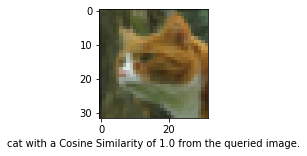

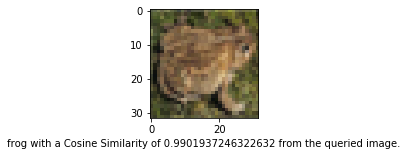

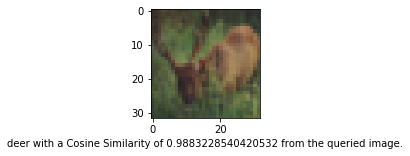

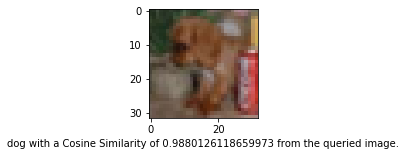

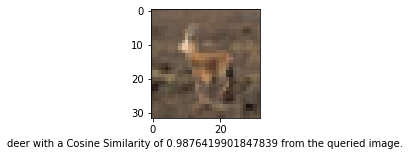

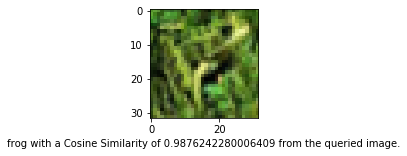

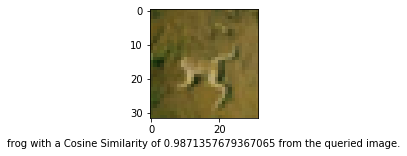

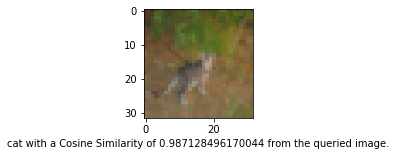

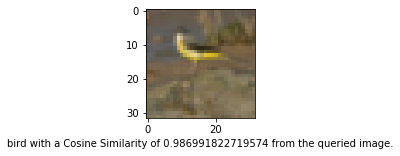

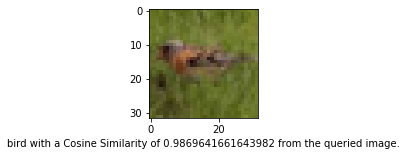

In [32]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [33]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [34]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
91,3,cat,0.748936,0.963851,0.828524,0.176164,0.075307,0.284767,1.077477,0.259401,...,1.158398,1.229319,1.003509,1.394807,1.413197,1.510301,1.169228,1.000000,0.000000,0.000000
481,6,frog,0.686223,0.844698,1.080878,0.293940,0.155542,0.346397,1.001105,0.442630,...,1.298430,1.348829,0.895133,1.326998,1.371920,1.464219,1.229681,0.990194,0.009806,1.877779
7161,5,dog,0.915408,1.053004,0.569877,0.063880,0.000000,0.186212,1.166819,0.054682,...,1.289511,1.328410,0.771532,1.360553,1.592199,1.469453,1.266751,0.988013,0.011987,2.079574
891,6,frog,0.461172,0.846415,1.015016,0.210848,0.407103,0.360950,1.003351,0.376731,...,1.298767,1.321133,0.897990,1.106992,1.343759,1.706415,1.254274,0.987624,0.012376,2.116760
5443,6,frog,0.628467,0.968738,1.229919,0.130499,0.091888,0.493291,0.957174,0.469957,...,1.311529,1.521461,0.581401,1.163436,1.603574,1.527905,1.197173,0.987136,0.012864,2.147659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7803,0,airplane,0.000000,0.000000,1.796607,1.489268,1.448660,0.563396,0.247240,1.282142,...,0.936844,1.578323,1.496615,2.459167,1.973677,0.533972,2.226960,0.795929,0.204071,9.370027
7835,0,airplane,0.000000,0.000000,1.806899,1.492787,1.455149,0.568691,0.241287,1.294569,...,0.670923,2.139343,1.676840,2.349479,1.747053,1.148406,1.960929,0.842111,0.157889,9.372849
9921,0,airplane,0.000000,0.000000,1.800443,1.485870,1.445554,0.561803,0.255171,1.274519,...,0.484217,1.309980,1.421823,2.292808,2.037745,0.333749,1.573088,0.788865,0.211135,9.437674
4453,0,airplane,0.384624,0.000000,0.000000,1.282761,0.941713,0.000000,0.540753,0.127646,...,0.516011,0.000000,1.660408,1.946223,0.055736,0.798045,0.901429,0.708277,0.291723,9.627804


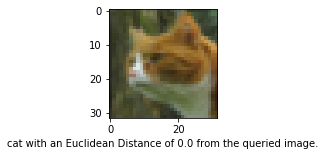

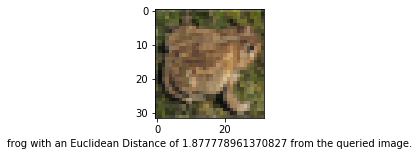

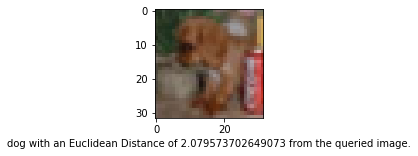

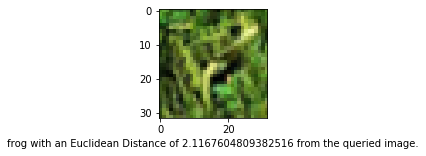

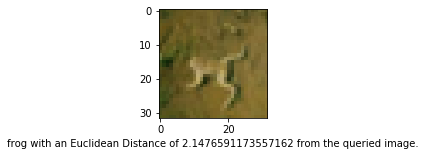

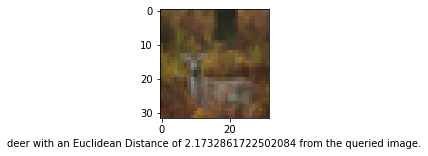

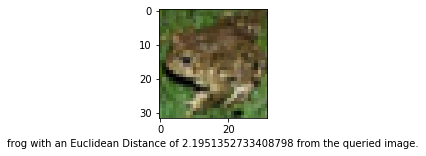

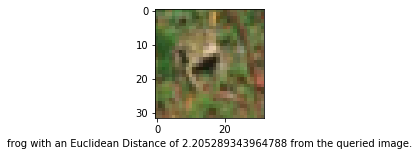

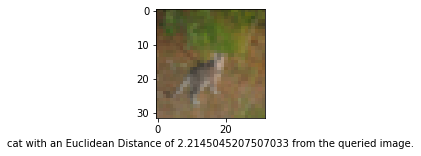

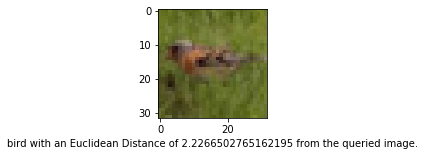

In [35]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()